# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень', 'Неоконченное высшее', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Развлечения/Искусство', 'Логистика', 'Маркетинг', 'Транспорт', 'Туризм', 'Сельское хозяйство', 'Торговля', 'Химия/Парфюмерия/Фармацевтика', 'Государственная служба', 'Другие сферы', 'Металлургия/Промышленность/Машиностроение', 'Подбор персонала', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы', 'Нефтегазовая промышленность', 'Недвижимость', 'Здравоохранение', 'Управляющая компания', 'Страхование', 'Строительство', 'Наука', 'Информационные технологии', 'Образование', 'Салоны красоты и здоровья', 'Юридические услуги/нотариальные услуги', 'Сборочные производства', 'ЧОП/Детективная д-ть', 'СМИ/Реклама/PR-агенства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# Проверим где есть пропуски
pd.isnull(df).sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [16]:
#Предположу, что пропуски в признаках будут влиять на точность модели. Поэтому нам нужно:
#    1. Нормировать их
#    2. Среди прочего избавиться от ненужных признаков
#Для столбцов с текстовыми признаками предлагаю ввести новую категорию "Не определено"
#GEN_INDUSTRY                   2713
#GEN_TITLE                      2713
#ORG_TP_STATE                   2713
#JOB_DIR                        2713
##############
# Данный признак я бы привел к бинарной форме 1 - С участием, 2 - Без участия. Пропуски бы пометил как Без участия
# ORG_TP_FCAPITAL
#############
# Следующий признак важный т.к. описывает регионы где клиент последний раз брал кредит. Тут,
# вероятно, нужно пофантазировать и переопределить регион у клиентов с пропусками скопировав регион 
# с признака FACT_ADDRESS_PROVINCE (Фактическоет пребывание клиента), где нет пропусков и структура такая же.
# Так как с большей степенью веротяности
# такой клиент возьмет свой следюущий кредит в том же регионе где он живет.
#TP_PROVINCE                     590
#############
# Признак время работы предлагаю, в случае пропуска, привести к 0 и предположить что человек нигде не работал
#WORK_TIME                      2717
#############
# Признак с картами так же предлагаю привести к явному 0 и предположить что клиент карты не утилизировал (так написано в description :) )
#PREVIOUS_CARD_NUM_UTILIZED    29533

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [17]:
#Категориальные признаки
#EDUCATION                     30133 non-null object
#MARITAL_STATUS                30133 non-null object
#GEN_INDUSTRY                  27420 non-null object
#GEN_TITLE                     27420 non-null object
#ORG_TP_STATE                  27420 non-null object
#JOB_DIR                       27420 non-null object
#FAMILY_INCOME                 30133 non-null object
#PERSONAL_INCOME               30133 non-null object
#REG_ADDRESS_PROVINCE          30133 non-null object
#FACT_ADDRESS_PROVINCE         30133 non-null object
#POSTAL_ADDRESS_PROVINCE       30133 non-null object
#TP_PROVINCE                   29543 non-null object
#REGION_NM                     30131 non-null object

# Предположу что все эти признакм нужно закодировать через One Hot Encodin
# Например через Pandas
emb = pd.get_dummies(df.EDUCATION, prefix='EDUCATION', prefix_sep='=')
emb.head()
# Ну и так далее

,EDUCATION=Высшее,EDUCATION=Два и более высших образования,EDUCATION=Неоконченное высшее,EDUCATION=Неполное среднее,EDUCATION=Среднее,EDUCATION=Среднее специальное,EDUCATION=Ученая степень
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
def preproc_data(df_input):
    df_output = df_input.copy()
    # Удалим ненужные признаки (по моему мнению)
    #df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    df_output = df_output.drop(['AGREEMENT_RK','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE'], axis=1)
    #df_output = df_output.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
    #df_output = df_output.drop(['TP_PROVINCE'], axis=1)
    
    # Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION'])
    df_output = pd.get_dummies(df_output, columns=['MARITAL_STATUS'])
    df_output = pd.get_dummies(df_output, columns=['GEN_INDUSTRY'])
    df_output = pd.get_dummies(df_output, columns=['GEN_TITLE'])
    df_output = pd.get_dummies(df_output, columns=['ORG_TP_STATE'])
    df_output = pd.get_dummies(df_output, columns=['JOB_DIR'])
    df_output = pd.get_dummies(df_output, columns=['FAMILY_INCOME'])
    df_output = pd.get_dummies(df_output, columns=['REG_ADDRESS_PROVINCE'])
    df_output = pd.get_dummies(df_output, columns=['FACT_ADDRESS_PROVINCE'])
    df_output = pd.get_dummies(df_output, columns=['REGION_NM'])
    
    # Удаляем пропуски
    df_output.loc[:, 'ORG_TP_FCAPITAL'] = df.ORG_TP_FCAPITAL.replace({'Без участия':0, 'С участием':1, np.NaN:0})
    df_output.loc[:, 'WORK_TIME'] = df.WORK_TIME.replace({np.NaN:0})
    df_output.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'] = df.PREVIOUS_CARD_NUM_UTILIZED.replace({np.NaN:0})

    # Разбираемся с точками и запятыми
    df_output.loc[:, 'PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:, 'CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:, 'FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:, 'LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:, 'LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    ## Your Code Here
    
    return df_output

In [19]:
df_preproc = df.pipe(preproc_data)

In [20]:
# Проверим типы данных
df_preproc.info('PERSONAL_INCOME')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 291 columns):
TARGET                                                    int64
AGE                                                       int64
SOCSTATUS_WORK_FL                                         int64
SOCSTATUS_PENS_FL                                         int64
GENDER                                                    int64
CHILD_TOTAL                                               int64
DEPENDANTS                                                int64
ORG_TP_FCAPITAL                                           int64
PERSONAL_INCOME                                           float64
REG_FACT_FL                                               int64
FACT_POST_FL                                              int64
REG_POST_FL                                               int64
REG_FACT_POST_FL                                          int64
REG_FACT_POST_TP_FL                                     

In [25]:
# Проверим пропуски
pd.isnull(df_preproc).sum()

TARGET                                               0
AGE                                                  0
SOCSTATUS_WORK_FL                                    0
SOCSTATUS_PENS_FL                                    0
GENDER                                               0
CHILD_TOTAL                                          0
DEPENDANTS                                           0
ORG_TP_FCAPITAL                                      0
PERSONAL_INCOME                                      0
REG_FACT_FL                                          0
FACT_POST_FL                                         0
REG_POST_FL                                          0
REG_FACT_POST_FL                                     0
REG_FACT_POST_TP_FL                                  0
FL_PRESENCE_FL                                       0
OWN_AUTO                                             0
AUTO_RUS_FL                                          0
HS_PRESENCE_FL                                       0
COT_PRESEN

In [26]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [27]:
X = df_train_preproc.iloc[:, 1:].values
y = df_train_preproc.loc[:, 'TARGET'].values


#### Задание 5. Обучение и оценка качества разных моделей

In [131]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
## Your Code Here


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [132]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_hat = dtc.predict(X_test)
y_hat_proba = dtc.predict_proba(X_test)

In [133]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat))


0.8031530545215678
0.18727272727272729


In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

(-0.01, 1.01)

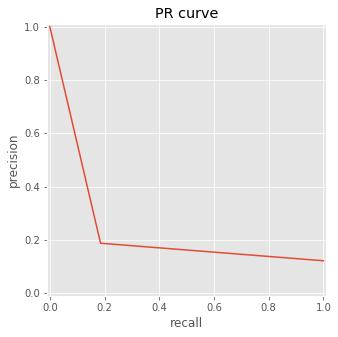

In [135]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

precision, recall, thresholds = \
precision_recall_curve(y_test, y_hat_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## Your Code Here

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1]) 

(-0.01, 1.01)

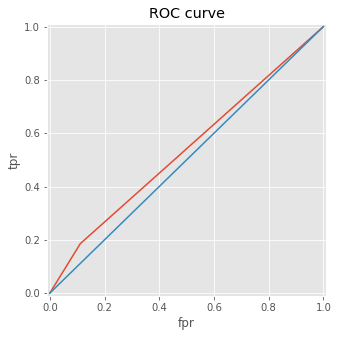

In [137]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [ ]:
# Померить roc_auc на тесте
